
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-1.20795808  0.84566164] [1. 0.]
[-0.3679812  -1.86009484] [0. 1.]
[ 1.75068715 -0.02454074] [0. 1.]
[-1.15751112  0.78387986] [1. 0.]
[0.47423414 0.14559574] [1. 0.]
[ 0.57472059 -0.11565898] [1. 0.]
[ 1.59710867 -0.92380694] [0. 1.]
[ 0.67379632 -1.15267848] [0. 1.]
[-0.6673606   1.43159645] [1. 0.]
[-0.87655567  1.42999158] [1. 0.]
[0.12044951 1.47646157] [1. 0.]
[-0.16369487 -0.5134652 ] [0. 1.]
[ 1.17752453 -1.19756654] [0. 1.]
[-2.01223541 -0.62344788] [1. 0.]
[-0.41155718 -0.06050651] [0. 1.]
[ 1.07067284 -1.83345891] [0. 1.]
[-1.61102986  0.24005516] [1. 0.]
[ 0.15772159 -1.32203759] [0. 1.]
[0.23186065 0.85849435] [1. 0.]
[-1.18297529  1.22277959] [1. 0.]
[ 1.1535286 -1.4274883] [0. 1.]
[ 0.93845623 -1.3659069 ] [0. 1.]
[1.63089456 0.64199986] [0. 1.]
[-0.59559671 -0.01281071] [0. 1.]
[-1.49425286  0.31580681] [1. 0.]
[-1.30092383  0.14931768] [1. 0.]
[-1.70814688 -0.603

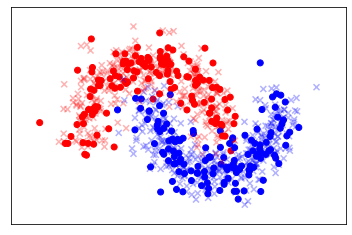

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

In [2]:
np.arange(50)*100 + 10

array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110,
       2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210,
       3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310,
       4410, 4510, 4610, 4710, 4810, 4910])

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**

MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(10,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.32524374
Iteration 2, loss = 0.94723554
Iteration 3, loss = 0.72045632
Iteration 4, loss = 0.61944375
Iteration 5, loss = 0.58232932
Iteration 6, loss = 0.56398580
Iteration 7, loss = 0.55626053
Iteration 8, loss = 0.55379519
Iteration 9, loss = 0.55014248
Iteration 10, loss = 0.54620405
Iteration 11, loss = 0.54387529
Iteration 12, loss = 0.54013536
Iteration 13, loss = 0.53981555
Iteration 14, loss = 0.53826308
Iteration 15, loss = 0.53520846
Iteration 16, loss = 0.53314398
Iteration 17, loss = 0.53080482
Iteration 18, loss = 0.52856827
Iteration 19, loss = 0.52724091
Iteration 20, loss = 0.52455659
Iteration 21, loss = 0.52373921
Iteration 22, loss = 0.52210661
Iteration 23, loss = 0.52053866
It

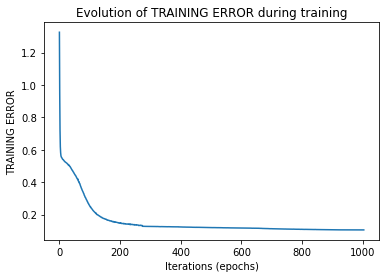

Acuracy (on test set) =  0.9587301587301588
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(110,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.03283178
Iteration 2, loss = 0.69530567
Iteration 3, loss = 0.59656349
Iteration 4, loss = 0.56290501
Iteration 5, loss = 0.54861160
Iteration 6, loss = 0.54145661
Iteration 7, loss = 0.53637435
Iteration 8, loss = 0.53345688
Iteration 9, loss = 0.52793105
Iteration 10, loss = 0.52530295
Iteration 11, loss = 0.52067947
Iteration 12, loss = 0.51672871
Iteration 13, loss = 0.51327230
Iteration 14, loss = 0.51078248
Iteration 15, loss = 0.50658596
Iteration 16, loss = 0.50383116
Iteration 17, loss = 0.50058835
Iteration 18, loss = 0.49627226
Iteration 19, loss = 0.49177668
Iteration 20, loss = 0.48896567
Iteration 21, loss = 0.48457329
Iteration 22, loss = 

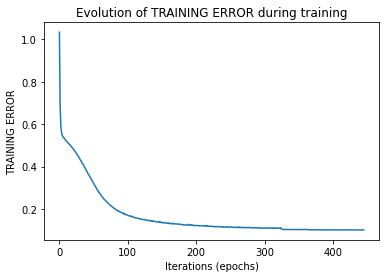

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(210,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 0.99136237
Iteration 2, loss = 0.67497711
Iteration 3, loss = 0.58504749
Iteration 4, loss = 0.55403114
Iteration 5, loss = 0.54145882
Iteration 6, loss = 0.53458563
Iteration 7, loss = 0.52972297
Iteration 8, loss = 0.52456265
Iteration 9, loss = 0.52340905
Iteration 10, loss = 0.51825662
Iteration 11, loss = 0.51471198
Iteration 12, loss = 0.51143356
Iteration 13, loss = 0.50869548
Iteration 14, loss = 0.50513692
Iteration 15, loss = 0.50241329
Iteration 16, loss = 0.49853019
Iteration 17, loss = 0.49748323
Iteration 18, loss = 0.49121535
Iteration 19, loss = 0.48930292
Iteration 20, loss = 0.48406802
Iteration 21, loss = 0.48051318
Iteration 22, loss = 

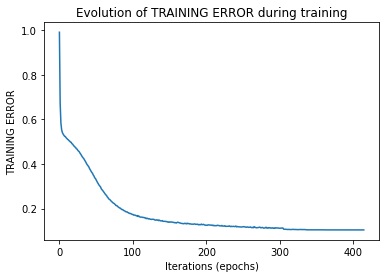

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(310,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06156033
Iteration 2, loss = 0.70103879
Iteration 3, loss = 0.59552728
Iteration 4, loss = 0.55904160
Iteration 5, loss = 0.54410734
Iteration 6, loss = 0.53696650
Iteration 7, loss = 0.53347105
Iteration 8, loss = 0.53079056
Iteration 9, loss = 0.52398705
Iteration 10, loss = 0.52210405
Iteration 11, loss = 0.51842510
Iteration 12, loss = 0.51605511
Iteration 13, loss = 0.51030072
Iteration 14, loss = 0.50790469
Iteration 15, loss = 0.50794765
Iteration 16, loss = 0.50151806
Iteration 17, loss = 0.49725849
Iteration 18, loss = 0.49403360
Iteration 19, loss = 0.49136992
Iteration 20, loss = 0.48744380
Iteration 21, loss = 0.48354813
Iteration 22, loss = 

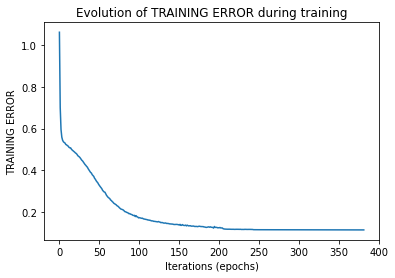

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(410,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06025575
Iteration 2, loss = 0.70347100
Iteration 3, loss = 0.59400301
Iteration 4, loss = 0.55805493
Iteration 5, loss = 0.54236362
Iteration 6, loss = 0.53436816
Iteration 7, loss = 0.52905728
Iteration 8, loss = 0.52442320
Iteration 9, loss = 0.52271849
Iteration 10, loss = 0.51935007
Iteration 11, loss = 0.51583157
Iteration 12, loss = 0.51208668
Iteration 13, loss = 0.50786302
Iteration 14, loss = 0.50561329
Iteration 15, loss = 0.50042420
Iteration 16, loss = 0.49814031
Iteration 17, loss = 0.49481506
Iteration 18, loss = 0.49122760
Iteration 19, loss = 0.48699410
Iteration 20, loss = 0.48515508
Iteration 21, loss = 0.48164968
Iteration 22, loss = 

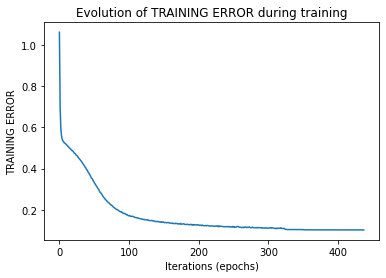

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(510,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.10328768
Iteration 2, loss = 0.72324360
Iteration 3, loss = 0.60287403
Iteration 4, loss = 0.56348486
Iteration 5, loss = 0.54662637
Iteration 6, loss = 0.53751071
Iteration 7, loss = 0.53112549
Iteration 8, loss = 0.52784268
Iteration 9, loss = 0.52204144
Iteration 10, loss = 0.51930868
Iteration 11, loss = 0.51729991
Iteration 12, loss = 0.51426463
Iteration 13, loss = 0.51187523
Iteration 14, loss = 0.50745648
Iteration 15, loss = 0.50297699
Iteration 16, loss = 0.50167763
Iteration 17, loss = 0.49881874
Iteration 18, loss = 0.49412554
Iteration 19, loss = 0.49062637
Iteration 20, loss = 0.48590605
Iteration 21, loss = 0.48202894
Iteration 22, loss = 

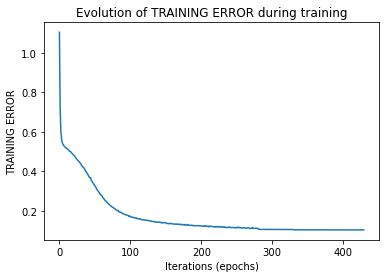

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(610,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06193031
Iteration 2, loss = 0.70339876
Iteration 3, loss = 0.59665783
Iteration 4, loss = 0.55919121
Iteration 5, loss = 0.54476333
Iteration 6, loss = 0.53675037
Iteration 7, loss = 0.52996614
Iteration 8, loss = 0.52668539
Iteration 9, loss = 0.52425106
Iteration 10, loss = 0.51960760
Iteration 11, loss = 0.51731463
Iteration 12, loss = 0.51403183
Iteration 13, loss = 0.51087376
Iteration 14, loss = 0.50604650
Iteration 15, loss = 0.50308017
Iteration 16, loss = 0.49977080
Iteration 17, loss = 0.49755965
Iteration 18, loss = 0.49505244
Iteration 19, loss = 0.49191004
Iteration 20, loss = 0.48615446
Iteration 21, loss = 0.48271615
Iteration 22, loss = 

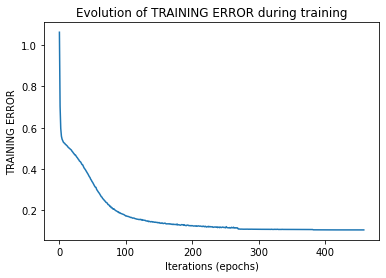

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(710,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.03671480
Iteration 2, loss = 0.69365958
Iteration 3, loss = 0.59445657
Iteration 4, loss = 0.55927711
Iteration 5, loss = 0.54610550
Iteration 6, loss = 0.53772571
Iteration 7, loss = 0.53484683
Iteration 8, loss = 0.53139198
Iteration 9, loss = 0.52728598
Iteration 10, loss = 0.52454477
Iteration 11, loss = 0.51906037
Iteration 12, loss = 0.51635188
Iteration 13, loss = 0.51355104
Iteration 14, loss = 0.50896999
Iteration 15, loss = 0.50725934
Iteration 16, loss = 0.50354153
Iteration 17, loss = 0.49919281
Iteration 18, loss = 0.49681782
Iteration 19, loss = 0.49421967
Iteration 20, loss = 0.48909035
Iteration 21, loss = 0.48399418
Iteration 22, loss = 

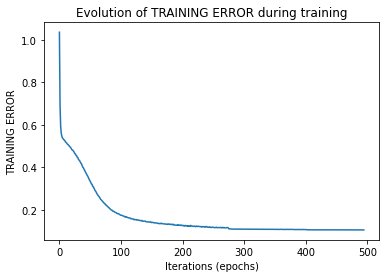

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(810,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05488724
Iteration 2, loss = 0.69759301
Iteration 3, loss = 0.59465050
Iteration 4, loss = 0.56019030
Iteration 5, loss = 0.54400286
Iteration 6, loss = 0.53581950
Iteration 7, loss = 0.53208202
Iteration 8, loss = 0.52573404
Iteration 9, loss = 0.52435485
Iteration 10, loss = 0.52010581
Iteration 11, loss = 0.51696076
Iteration 12, loss = 0.51376452
Iteration 13, loss = 0.51220856
Iteration 14, loss = 0.50614237
Iteration 15, loss = 0.50437985
Iteration 16, loss = 0.49964239
Iteration 17, loss = 0.49530434
Iteration 18, loss = 0.49043981
Iteration 19, loss = 0.48771352
Iteration 20, loss = 0.48411876
Iteration 21, loss = 0.48045927
Iteration 22, loss = 

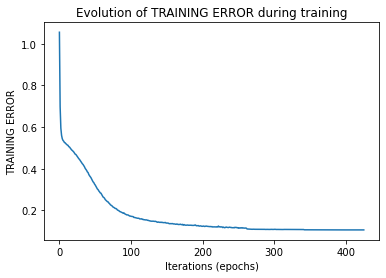

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(910,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07438062
Iteration 2, loss = 0.70741476
Iteration 3, loss = 0.59711721
Iteration 4, loss = 0.55926499
Iteration 5, loss = 0.54819543
Iteration 6, loss = 0.53706175
Iteration 7, loss = 0.53247760
Iteration 8, loss = 0.52766137
Iteration 9, loss = 0.52329768
Iteration 10, loss = 0.52184001
Iteration 11, loss = 0.51847308
Iteration 12, loss = 0.51480889
Iteration 13, loss = 0.50950843
Iteration 14, loss = 0.50612607
Iteration 15, loss = 0.50477897
Iteration 16, loss = 0.49977791
Iteration 17, loss = 0.49648226
Iteration 18, loss = 0.49489657
Iteration 19, loss = 0.48759041
Iteration 20, loss = 0.48629115
Iteration 21, loss = 0.48015719
Iteration 22, loss = 

In [ ]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)

acuracy = {}
for k in np.arange(50)*100 + 10:
    mlp = MLPClassifier(hidden_layer_sizes=(k, ), activation='relu', solver='sgd', 
                        alpha=0.0000001, batch_size=4, learning_rate='adaptive', learning_rate_init=0.005, 
                        power_t=0.5, max_iter=2000, shuffle=True, random_state=11, tol=0.00001, 
                        verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                        early_stopping=False, validation_fraction=0.2, 
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    print(mlp)
    # NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
    #   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
    # NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

    # Train the MLP classifier on the training dataset
    mlp.fit(Xmoon_train, Ymoon_train_OneHot)
    #print()

    # Plot the LEARNING CURVE
    plt.title("Evolution of TRAINING ERROR during training")
    plt.xlabel("Iterations (epochs)")
    plt.ylabel("TRAINING ERROR")
    plt.plot(mlp.loss_curve_)
    plt.show()

    # Evaluate acuracy on TEST data
    score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
    print("Acuracy (on test set) = ", score)
    acuracy[k] = score

print(acuracy)

In [118]:
max(acuracy)

4910

MLPClassifier(activation='relu', alpha=1e-07, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 10), learning_rate='constant',
              learning_rate_init=0.005, max_iter=500, momentum=0.8,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=11, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.2, verbose=True, warm_start=False)
Iteration 1, loss = 1.00537847
Iteration 2, loss = 0.59263418
Iteration 3, loss = 0.49155330
Iteration 4, loss = 0.41345650
Iteration 5, loss = 0.33433185
Iteration 6, loss = 0.25145204
Iteration 7, loss = 0.20310026
Iteration 8, loss = 0.20136658
Iteration 9, loss = 0.15809364
Iteration 10, loss = 0.13537820
Iteration 11, loss = 0.10689605
Iteration 12, loss = 0.11655610
Iteration 13, loss = 0.10443591
Iteration 14, loss = 0.09236458
Iteration 15, loss = 0.13810286
Iteration 16, loss = 0.08691264
Iteratio

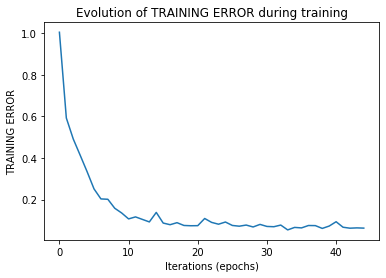

Acuracy (on test set) =  0.9619047619047619


In [40]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)

mlp = MLPClassifier(hidden_layer_sizes=(50, 10,), activation='relu', solver='adam', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
#print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

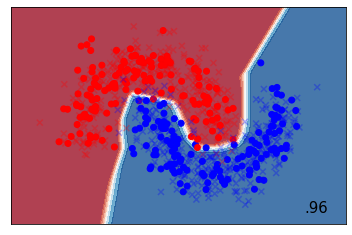

In [41]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 0.001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}

Grid scores on development set:

0.833 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.852 (+/-0.046) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.878 (+/-0.094) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.952 (+/-0.038) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.830 (+/-0.058) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.889 (+/-0.065) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.900 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.937 (+/-0.064) for {'alpha': 1e-05, 'hidden_lay

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.

**Assignment #4: display the confusion matrix as a prettier and more easily understable plot (cf. example on https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)**

**Assignment #5 (optional): plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**


Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

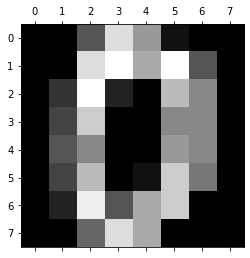

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.01, max_iter=9, momentum=0.8,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=11, shuffle=True, solver='sgd', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)
Iteration 1, loss = 0.84598640
Iteration 2, loss = 0.42266720
Iteration 3, loss = 0.32807737
Iteration 4, loss = 0.28872864
Iteration 5, loss = 0.30061037
Iteration 6, loss = 0.25480669
Iteration 7, loss = 0.24196842
Iteration 8, loss = 0.28037790
Iteration 9, loss = 0.19353264


C:\Users\rpatureau\Documents\Winpython\python-3.7.4.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


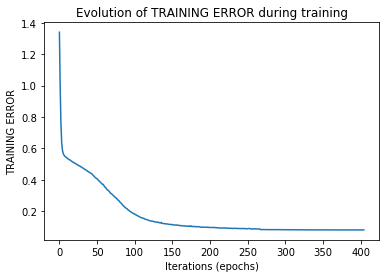

Acuracy (on test set) =  0.9377085650723026
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.90      0.85      0.87        97
           2       0.97      0.99      0.98        86
           3       0.99      0.86      0.92        97
           4       0.99      0.96      0.97        95
           5       0.97      0.98      0.97        85
           6       0.99      0.98      0.98        83
           7       0.98      0.95      0.96        94
           8       0.74      0.98      0.84        88
           9       0.95      0.88      0.91        82

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899

CONFUSION MATRIX below


array([[91,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 82,  1,  0,  0,  1,  0,  0, 12,  1],
       [ 0,  1, 85,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 83,  0,  1,  0,  0, 10,  1],
       [ 1,  1,  0,  0, 91,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 83,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 81,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 89,  3,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 86,  1],
       [ 0,  3,  0,  1,  0,  1,  0,  2,  3, 72]], dtype=int64)

In [97]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   
